In [70]:
import numpy as np
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt

In [71]:
tf.disable_eager_execution()

In [72]:
def get_data():
    x = np.linspace(-1, 1, 100)
    y = 2 * x + np.random.randn(*x.shape) * 0.3
    return x, y

In [76]:
def linear_regression(graph):
    with graph.as_default():      
        # Note: shape=(None,) 说明该变量是一个一维动态变量，这个维度上可以是任意大小。
        # Note: The second argument shape=(None,) indicates that 
        # these variables take on a 1-dimensional value of a dynamic size.
        # We can use the None value in this case to allow for arbitrary batch sizes.
        x = tf.placeholder(tf.float32, shape=(None,), name="x")
        y = tf.placeholder(tf.float32, shape=(None,), name="y")

        with tf.variable_scope('lreg') as scope:
            w = tf.Variable(np.random.normal(), name="W")
            b = tf.Variable(np.random.normal(), name="b")
            y_pred = tf.multiply(w, x) + b

            loss = tf.reduce_mean(tf.square(y_pred - y))
        return x, y, y_pred, loss    

In [79]:
def run():
    g1 = tf.Graph()
    
    with g1.as_default():   
        x_batch, y_batch = get_data()
        x, y, y_pred, loss = linear_regression(g1)

        optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
        init = tf.global_variables_initializer()

        with tf.Session() as sess:
            tf.summary.FileWriter('./logs/linear-regression', sess.graph)
            sess.run(init)

            feed_dict = {x:x_batch, y: y_batch}
            for epoch in range(100):
                loss_val, _ = sess.run([loss, optimizer], feed_dict)
                if (epoch % 20 == 0):
                    print("loss:", loss_val)

            y_pred_batch = sess.run(y_pred, {x: x_batch})
    
    plt.figure(1)
    plt.plot(x_batch, y_batch, 'ro', label="Original Data")
    plt.plot(x_batch, y_pred_batch)
    plt.legend()
    plt.show()


loss: 2.979342
loss: 0.12556076
loss: 0.09151997
loss: 0.08950394
loss: 0.08938347


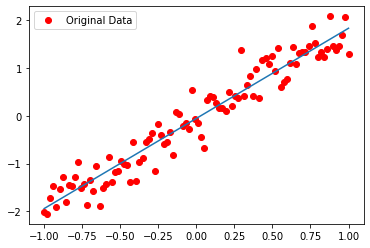

In [80]:
run()

<img src="linear-regression-stanford.png" />